# Task - 6 KNN

In [5]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 2: Load and Prepare Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
target_names = iris.target_names

In [6]:
# Step 3: Data Cleaning
# Check for missing values
print("\nMissing values in dataset:", df.isnull().sum().sum())  # Should be 0

# Remove duplicates
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")

# Check class balance
print("\nClass distribution:")
print(df['target'].value_counts())


Missing values in dataset: 0
Removed 1 duplicate rows.

Class distribution:
target
0    50
1    50
2    49
Name: count, dtype: int64


In [7]:
# Step 4: Feature Scaling
X = df.drop("target", axis=1)
y = df["target"]

In [8]:
# Step 4: Feature Scaling
X = df.drop("target", axis=1)
y = df["target"]

# ✅ FIX: Scale the features before using them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


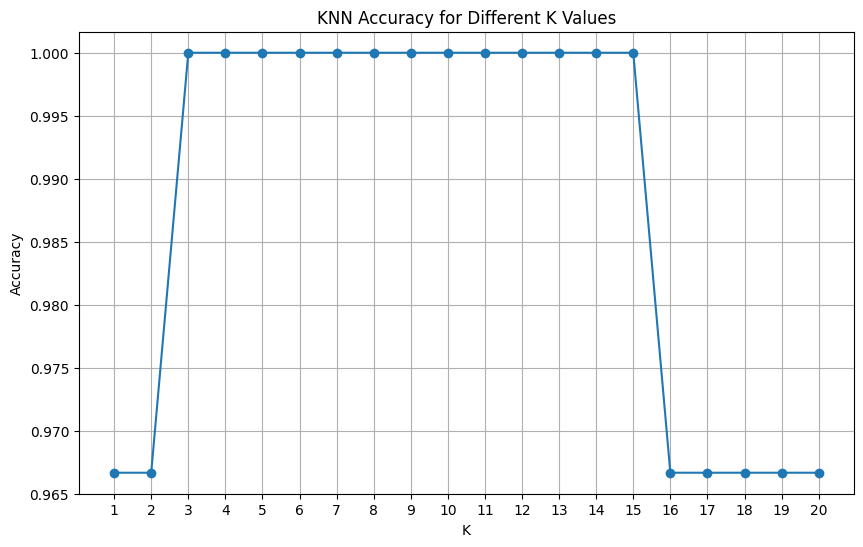

In [9]:
# Step 6: Try Different K Values
# ---------------------------------------
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [10]:
# Step 7: Train Final Model with Best K
best_k = k_range[np.argmax(accuracies)]
print(f"\n✅ Best K: {best_k} with Accuracy: {max(accuracies):.2f}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)



✅ Best K: 3 with Accuracy: 1.00



Confusion Matrix:


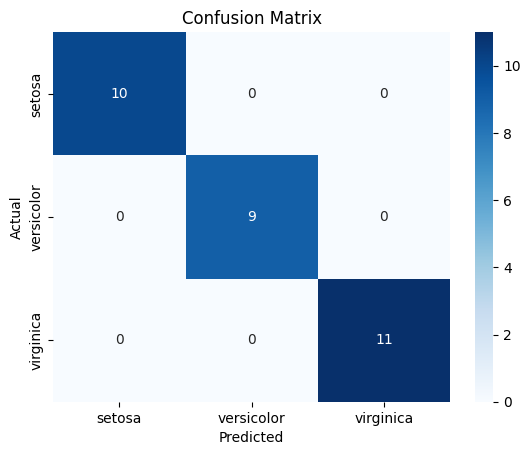


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [11]:
# Step 8: Model Evaluation
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


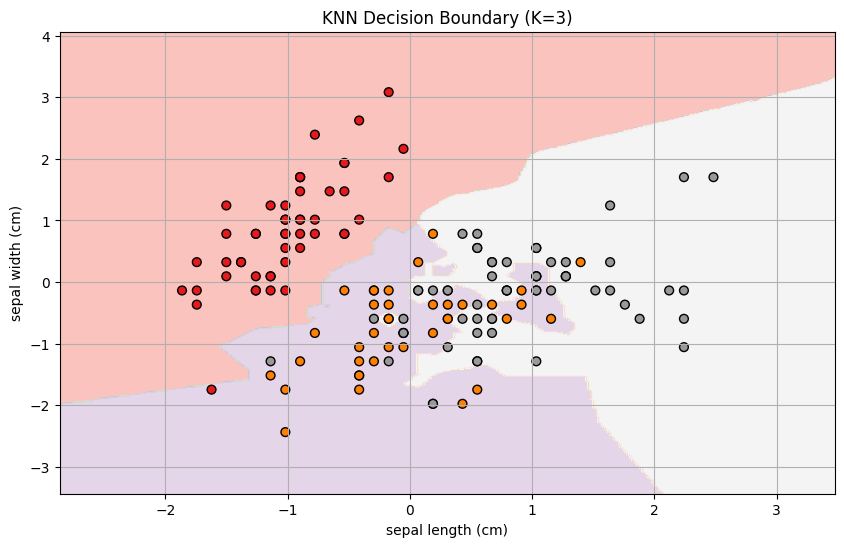

In [12]:
# Step 9: Decision Boundary Visualization (2 Features)
# We'll use only the first two features for plotting
X_2d = X_scaled[:, :2]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_train_2d)

# Create meshgrid
h = 0.02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.grid(True)
plt.show()
